# Data Analysis for Mobile gaming

Here we have a data set of mobile game. We see the first row of the dataset below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns

In [2]:
df=pd.read_csv('mibilegame.csv') 

In [5]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<div dir=rtl>
براساس اطلاعات سوال دو تا گروه داریم: گروه اول کسانیکه تبلیغات را دیده اند و مقدار version برای آنها برابر gate_40 است. و گروه دوم گروهی که تبلیغات را ندیده اند و version آنها gate_30 است.
    میانگین گروه اول بر روی ستون sum_game_round برابر ad_mean و میانگین گروه دوم noAd_mean است که نشان میدهد گروهی که تبلیغات دیده اند حتی بطور میانگین در تعداد  دورهای بازی کاهش داشته اند: 

</div>

In [3]:
df_ad=df[df.version=='gate_40']
df_noAd=df[df.version=='gate_30']

ad_mean   = df_ad.sum_gamerounds.mean()
noAd_mean = df_noAd.sum_gamerounds.mean()
origional_mean_diff = df_ad.sum_gamerounds.mean() - df_noAd.sum_gamerounds.mean()

print(f"ad_mean   = {ad_mean}")
print(f"noAd_mean = {noAd_mean}")
print(f"ad_mean - noAd_mean = { origional_mean_diff}")

ad_mean   = 51.29877552814966
noAd_mean = 52.45626398210291
ad_mean - noAd_mean = -1.157488453953249


به این ترتیب نیازی نیست چک کنیم آیا تبلیغات اثر مثبت روی افزایش گیم روندها داشته یا نه.
اما بیاییم ببینیم آیا روش بد تبلیغات باعث این کاهش در گیم روندها بوده یا اینکه این مقدار کاهش شانسی بوده است. برای این کار از یو تست می توان استفاده کرد. این تست نشان داد که بله تبلیغات با شیوه نامناسب باعث کاهش استقبال از بازی بوده است:



In [4]:
confidence_level=0.05
u_stat, p_value = stats.mannwhitneyu(df_noAd['sum_gamerounds'] , df_ad['sum_gamerounds'] , alternative='greater')
print (f"The u-test 's p_value is {p_value} and confidence level is : {confidence_level}. Hence: ")
if p_value < confidence_level:
    print('U-test confirms that bad advertisements tended to the reduction of sum_gamerounds')
else:
    print("There is no evidence that sum_gamerounds' reduction is due to the bad advertisements.")

The u-test 's p_value is 0.05020880772044255 and confidence level is : 0.05. Hence: 
There is no evidence that sum_gamerounds' reduction is due to the bad advertisements.


<div dir=rtl>
    می توانیم با استفاده از a/b تست هم این تست را انجام دهیم. برچسب های رندوم برای دیتا تولید کنیم به طوری که شانس افتادن در گروه ad باندازه len_ad/len_total باشد و باندازه یک منهای این مقدار شانس افتادن در گروه noAd باشد. سپس این برچسبهای شانسی را به دیتا یعنی ستون sum_game_round میدهیم تا دو گروه شانسی ad , noAd جدید تشکیل شود و سپس تفاضل میانگینهای sum_game_rond برای دو گروه شانسی را را محاسبه میکنیم. این کار را N=10000 بار تکرار میکنیم و سپس میبینیم در چند درصد موراد این تفاضل میانگینهای دوگروه شانسی از تفاضل میانگینهای دو گروه اورجینال (مشاهداتمان) کمتر است:
    
</div>

In [7]:
N=10000

def sh_exp(N   ):
    len_total=len(df)
    len_ad=len(df_ad)
    len_noAd=len(df_noAd) 
    chancy_labeled_mean_diff = np.empty([N, 1])
    for times in np.arange(N):
        chancy_labels = np.random.choice([1,0], size=len_total,  p=[len_ad/len_total ,1-len_ad/len_total ])
        chancy_labeled_data = np.array([
            chancy_labels,
            np.array(df.sum_gamerounds)
            
        ]).T
        chancy_labeled_mean_ad   = chancy_labeled_data[chancy_labeled_data[:, 0] == 1][:, 1].mean()
        chancy_labeled_mean_noAd = chancy_labeled_data[chancy_labeled_data[:, 0] == 0][:, 1].mean()
        chancy_labeled_mean_diff[times] = chancy_labeled_mean_ad - chancy_labeled_mean_noAd
    return chancy_labeled_mean_diff


e=sh_exp(N  )
p_value = len(e [e <  origional_mean_diff]) / len(e)
if p_value<confidence_level:
    print(f'p_value = {p_value} implies Bad advertisements was the reason for reduction of sum of game rounds')
else:
    print(f"p_value = {p_value}. There is not enough evidences that confirm the bad advertisements was the reason for reduction in sum of game rounds")

p_value = 0.2397. There is not enough evidences that confirm the bad advertisements was the reason for reduction in sum of game rounds


<Axes: ylabel='Count'>

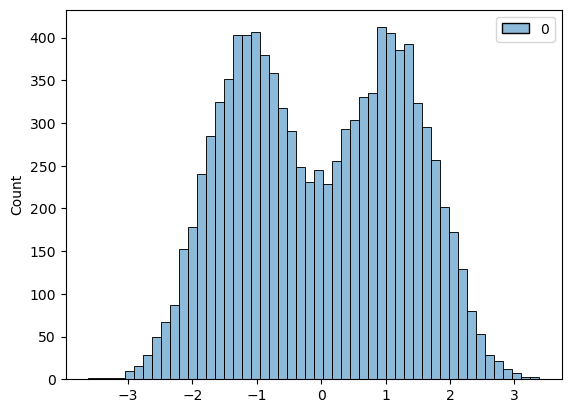

In [17]:
sns.histplot(e, bins=50)